# Proyecto Top Games Google Play

En esta ocasión vamos a análizar un dataset del top 100 de videojuegos disponibles en Google Play Store.

Fuente de datos: android-games.csv

Dataset original: Top Games on Google Play Store

Información del dataset

Este dataset contiene el top 100 de videojuegos por cada categoría en Google Play Store, con información de las calificaciones y otros datos como precio y numero de instalaciones.

Columnas

* Rank: Posición del videojueo en una categoria en particular.
* Title: Nombre del videojuego.
* Total ratings: Número total de calificaciones.
* Installs: Número de instalaciones apróximado.
* Average rating: Calificación promedio hasta 5.
* Growth (30 days): Crecimiento porcentual en 30 días.
* Growth (60 days): Crecimiento porcentual en 60 días.
* Price: Precio en dolares.

Category: Categoría del videojuego.

* 5 star ratings: Número de calificaciones de 5 estrellas.
* 4 star ratings: Número de calificaciones de 4 estrellas.
* 3 star ratings: Número de calificaciones de 3 estrellas.
* 2 star ratings: Número de calificaciones de 2 estrellas.
* 1 star ratings: Número de calificaciones de 1 estrella.
* Paid: Es un videojuego pago (True) o gratis (False).

Aclaraciones

El crecimiento porcentual se caulcula teniendo en cuenta la cantidad total de instalaciones y la cantidad total de calificaciones, con ello encontrar el porcentaje de crecimiento promedio.
Cada puesto en el top 100 fue registrado en una día del año, en total 100 días: * 01/01/2020: Registro puesto 1 * 02/01/2020: Registro puesto 2

In [3]:
# Importamos las librerias
#Procesamiento
import pandas as pd
import numpy as np
import datetime as dt
import missingno as msno

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [4]:
# Carga de la data
android_games = pd.read_csv('/workspaces/Top-games-googleplay/data/raw/android-games.csv')

In [5]:
android_games.head()

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1/1/2020,1,Garena Free Fire- World Series,86273129,500.0 M,4.0,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,1/2/2020,2,PUBG MOBILE - Traverse,37276732,500.0 M,4.0,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,1/3/2020,3,Mobile Legends: Bang Bang,26663595,100.0 M,4.0,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,1/4/2020,4,Brawl Stars,17971552,100.0 M,4.0,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,1/5/2020,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4.0,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [6]:
android_games.tail()

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1731,1/2/2020,2,The Four Winds by Kristin Hannah,120533,1.0 M,4.0,0.00,0.0,0.0,FICTION BOOK,74096,21404,10592,4736,9702,False
1732,1/3/2020,3,Every Last Fear by Alex Finlay,115437,5.0 M,2.0,0.20,0.5,0.0,FICTION BOOK,85169,16622,6802,1848,4994,True
1733,1/4/2020,4,Fake Accounts by Lauren Oyler,112408,1.0 M,4.0,0.00,1.8,0.0,FICTION BOOK,101036,3607,3237,1229,3297,False
1734,1/1/2020,1,Barack Obama,111595,1.0 M,3.0,0.90,2.3,0.0,BIOGRAPHY BOOK,88950,14856,4297,1385,2103,True
1735,1/2/2020,2,Steve Jobs,110723,10.0 M,4.0,0.76,1.9,0.0,BIOGRAPHY BOOK,64184,18332,9385,6688,12132,True


In [7]:
android_games.shape

(1736, 16)

### EDA - Analisis Exploratorio de Datos

In [8]:
android_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1736 non-null   object 
 1   rank              1736 non-null   int64  
 2   title             1736 non-null   object 
 3   total ratings     1736 non-null   int64  
 4   installs          1736 non-null   object 
 5   average rating    1728 non-null   float64
 6   growth (30 days)  1736 non-null   float64
 7   growth (60 days)  1736 non-null   float64
 8   price             1736 non-null   float64
 9   category          1736 non-null   object 
 10  5 star ratings    1736 non-null   int64  
 11  4 star ratings    1736 non-null   int64  
 12  3 star ratings    1736 non-null   int64  
 13  2 star ratings    1736 non-null   int64  
 14  1 star ratings    1736 non-null   int64  
 15  paid              1729 non-null   object 
dtypes: float64(4), int64(7), object(5)
memory 

In [9]:
android_games.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1736.000000,1.736000e+03,1728.00000,1736.000000,1736.000000,1736.000000,1.736000e+03,1.736000e+03,1.736000e+03,1.736000e+03,1.736000e+03
mean,50.220046,1.110679e+06,3.90625,320.626187,122.139113,0.010904,7.964405e+05,1.189283e+05,5.870517e+04,2.824129e+04,1.083608e+05
std,29.025100,3.988018e+06,0.29551,6008.527713,2250.002200,0.214616,2.948668e+06,3.232236e+05,1.668288e+05,9.569178e+04,5.046927e+05
min,1.000000,3.299300e+04,2.00000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.742272e+05,4.00000,0.100000,0.200000,0.000000,1.268265e+05,2.056625e+04,9.609000e+03,4.235000e+03,1.265300e+04
50%,50.000000,4.276935e+05,4.00000,0.500000,1.000000,0.000000,2.957355e+05,5.085100e+04,2.494450e+04,1.061450e+04,3.359650e+04
75%,75.000000,8.837410e+05,4.00000,1.700000,3.300000,0.000000,6.184412e+05,1.016020e+05,5.208700e+04,2.320825e+04,8.010575e+04
max,100.000000,8.627313e+07,4.00000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


#### Visualización

(array([   2.,    0.,    0.,    0.,    0.,  158.,    0.,    0.,    0.,
        1568.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

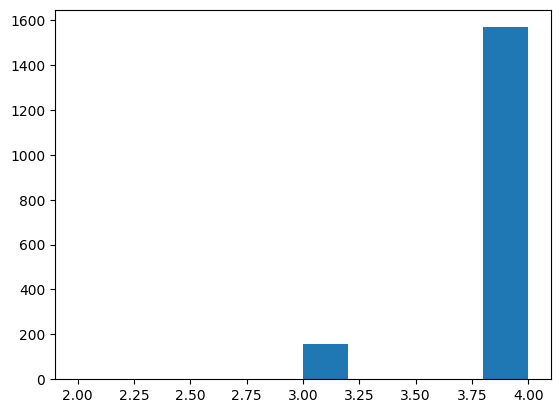

In [10]:
# Matplotlib
plt.hist(android_games['average rating'])

<Axes: xlabel='paid', ylabel='count'>

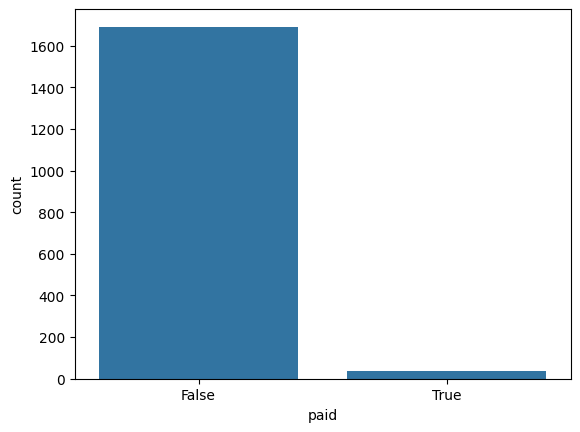

In [11]:
# Seaborn
sns.countplot(x='paid', data=android_games)